In [1]:
# Importing Libraries

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading Data into Data Frame df

In [26]:
df = pd.read_csv(r"C:\Users\srish\Downloads\insuranceFraud (1).csv")

In [27]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [28]:
pd.set_option("display.max_columns", None)

In [ ]:
# checking for Null values, Noise values and Cleaning columns

In [29]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [30]:
# checking for 
for i in df:
    print(df[i])
    print(df[i].sort_values().unique())
    print('--------------------------------')

0      328
1      228
2      134
3      256
4      228
      ... 
995      3
996    285
997    130
998    458
999    456
Name: months_as_customer, Length: 1000, dtype: int64
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  19  20  22  24  25  26  27  29  30  31  32  33  34  35  36  37  38  39
  40  41  43  45  46  47  48  50  51  53  54  55  56  57  58  59  60  61
  62  63  64  65  66  67  69  70  72  73  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 171 172 173 174
 175 176 177 178 179 180 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 216 21

In [31]:
df.property_damage = df.property_damage.replace('?','Unknown')

In [32]:
df.police_report_available  = df.police_report_available.replace("?","unknown")

In [33]:
df.collision_type = df.collision_type.replace("?","unknown")

In [34]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [39]:
df.policy_bind_date = df.policy_bind_date.astype('datetime64')

C:\Users\srish\AppData\Local\Temp\ipykernel_4148\4294554630.py:1: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  df.policy_bind_date = df.policy_bind_date.astype('datetime64')


In [40]:
df.incident_date = df.incident_date.astype('datetime64')

C:\Users\srish\AppData\Local\Temp\ipykernel_4148\3845404915.py:1: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  df.incident_date = df.incident_date.astype('datetime64')


In [37]:
df["Date-diff"] = (df['incident_date'] - df['policy_bind_date'] ).dt.days

In [41]:
for i in df:
    if df[i].dtypes == "O" and df[i].nunique() > 5:
        df.drop(i, axis = 1, inplace = True)                          

In [42]:
df.drop(['policy_number','policy_bind_date','incident_date',"auto_year",'insured_zip'], axis = 1 , inplace = True)

In [43]:
df.shape

(1000, 26)

In [ ]:
# Applying Scaling

In [44]:
num = []
cat = []
for i in df.columns:
    if df[i].dtype == "O":
        cat.append(i)
    else:
        num.append(i)

In [45]:
print(cat)
print('---')
print(num)

['policy_state', 'policy_csl', 'insured_sex', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'property_damage', 'police_report_available', 'fraud_reported']
---
['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'Date-diff']


In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [47]:
df[num] =sc.fit_transform(df[num])

In [48]:
cat.remove("fraud_reported")

In [49]:
df['fraud_reported'] = df['fraud_reported'].replace("Y",1)
df['fraud_reported'] = df['fraud_reported'].replace("N",0)

In [50]:
df = pd.get_dummies(data = df, columns= cat, drop_first= True)

In [ ]:
# Checking for Outliers

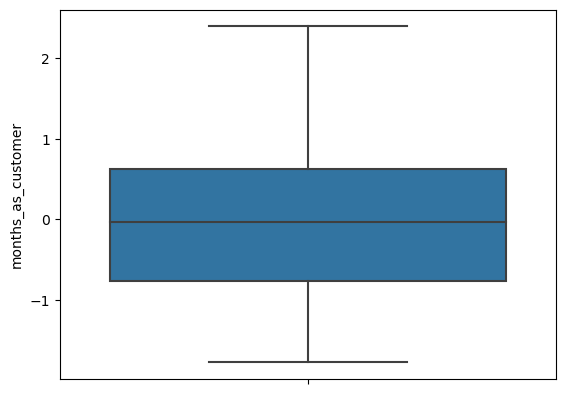

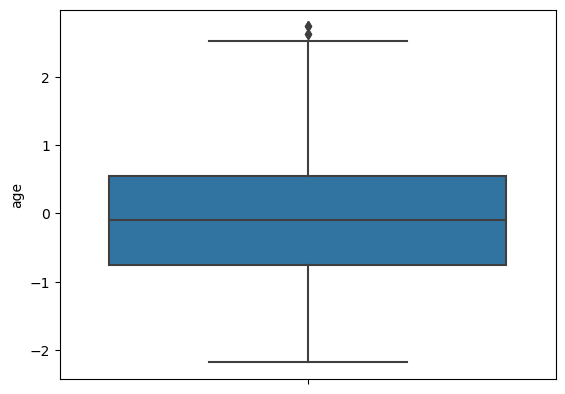

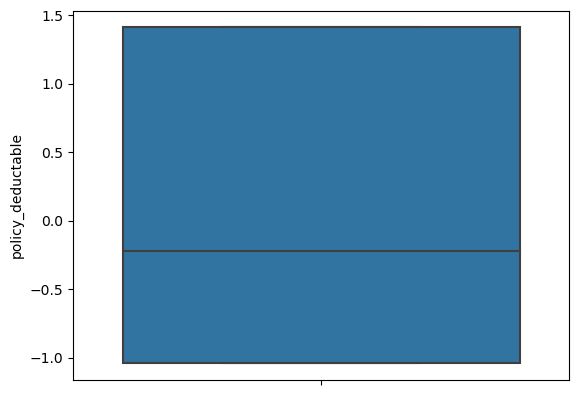

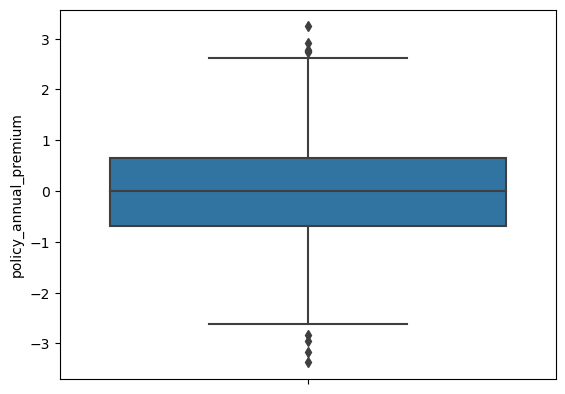

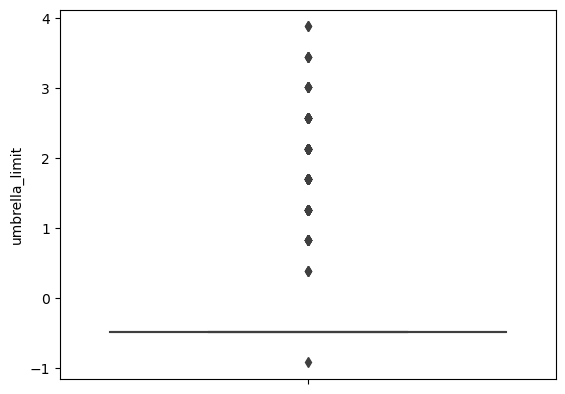

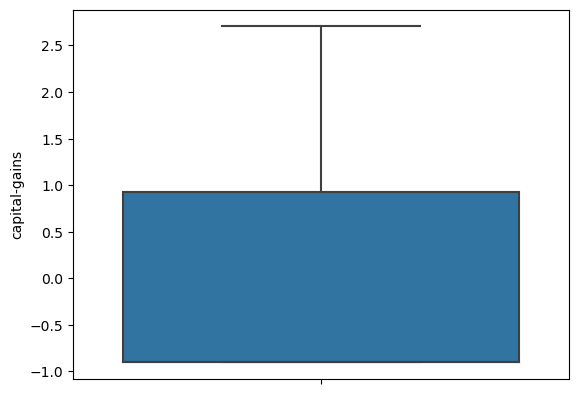

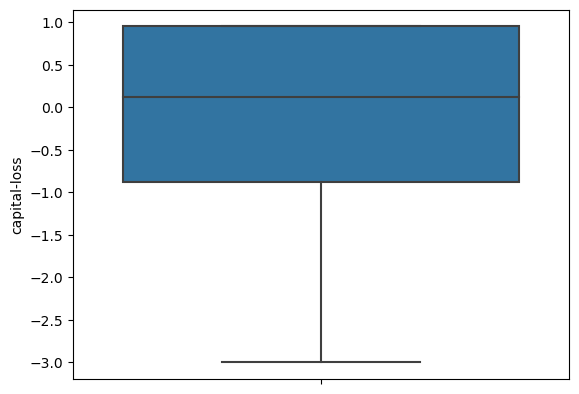

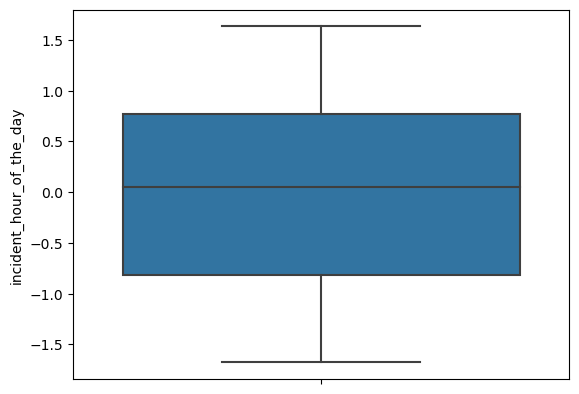

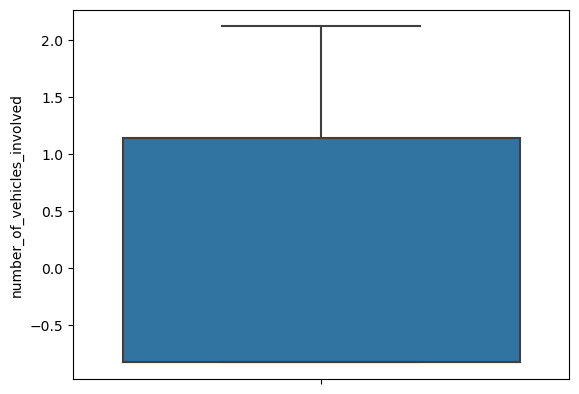

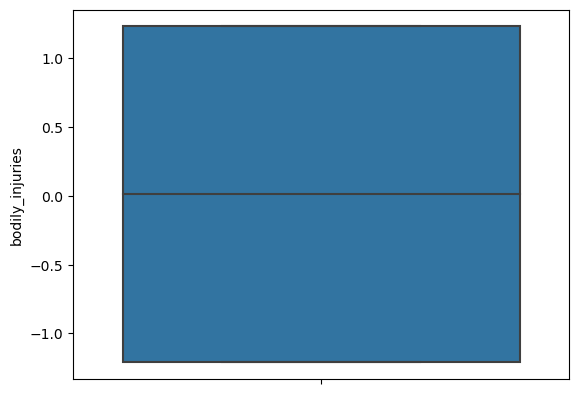

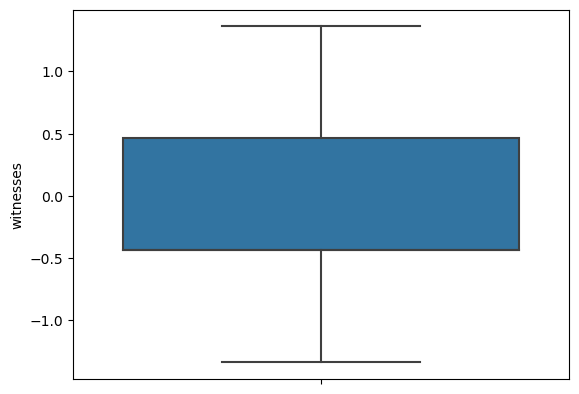

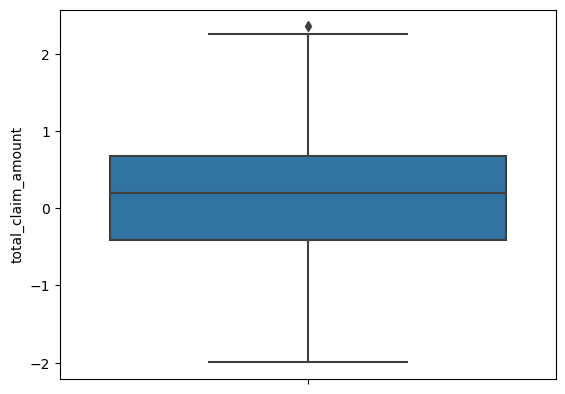

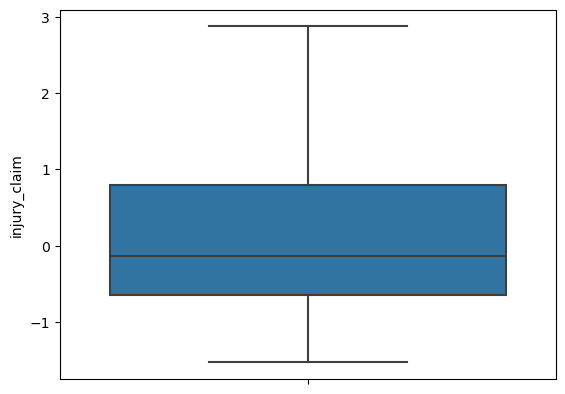

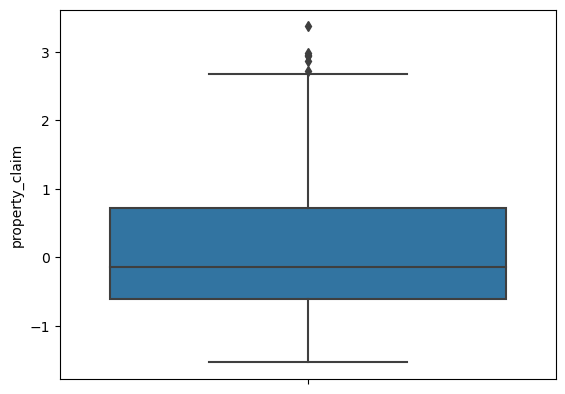

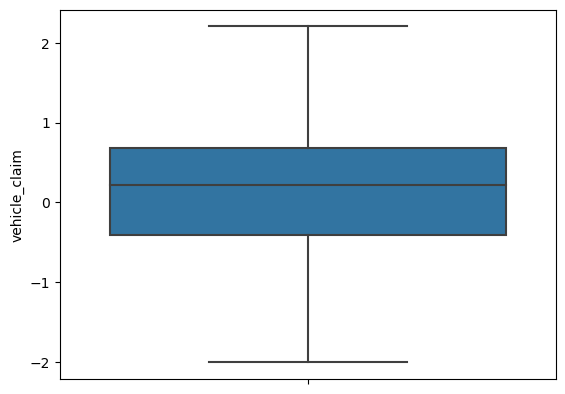

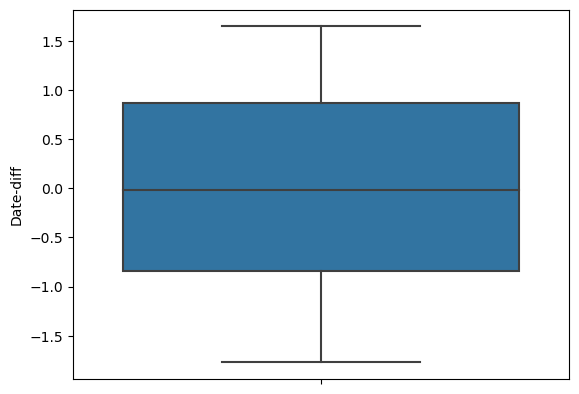

In [51]:
for i in num:
    plt.figure()
    sns.boxplot(y = i, data = df)

In [75]:
Outliers = ['age','policy_annual_premium','property_claim','umbrella_limit']

In [76]:
for j in Outliers:
    q1 = df[j].quantile(0.25)
    q3 = df[j].quantile(0.75)
    iqr = q3-q1
    ul = q3 + 1.5*iqr
    ll = q1 - 1.5*iqr
    
    for i in df[j]:
        if i > ul:
            df[j] = df[j].replace(i,ul)
        elif i < ll:
            df[j] = df[j].replace(i,ll)
    

In [55]:
# Importing LogistiRegression libraries and Evalution Metrics

In [56]:
from sklearn.linear_model import LogisticRegression 

In [57]:
from sklearn import metrics 
from sklearn.model_selection import train_test_split

In [58]:
lg = LogisticRegression()

In [59]:
x = df.drop("fraud_reported", axis =1)
y = df['fraud_reported']

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size= 0.25, random_state= 15)

In [61]:
lg.fit(x_train,y_train)

LogisticRegression()

In [63]:
y_pred = lg.predict(x_test)

In [71]:
print('Accuracy Score:',metrics.accuracy_score(y_test, y_pred))
print('Recall Score:',metrics.recall_score(y_test, y_pred))
print('Precision Score:',metrics.precision_score(y_test, y_pred))
print('F1 Score:',metrics.f1_score(y_test, y_pred))

Accuracy Score: 0.808
Recall Score: 0.4576271186440678
Precision Score: 0.627906976744186
F1 Score: 0.5294117647058824


In [80]:
df.to_csv(r"C:\Users\srish\Downloads\insuranceFraud (1).csv", index=False)